In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from datapackage import Package

package = Package('https://datahub.io/core/covid-19/datapackage.json')

# print list of all resources:
# print(dir(package))
# print(package.resource_names)
data = package.get_resource('time-series-19-covid-combined')

# print processed tabular data (if exists any)
# for resource in package.resources:
#     print(dir(resource))
#     print(resource.name)
#     if resource.descriptor['datahub']['type'] == 'derived/csv':
#         print(resource.schema.headers)
# #         data = resource.read()

In [3]:
reference_date = datetime(2020, 1, 1).date()
df = pd.DataFrame(data.read(keyed=True))

In [4]:
df.tail()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
22699,2020-04-12,Zimbabwe,None,-20.0,30.0,14.0,0.0,3.0
22700,2020-04-13,Zimbabwe,None,-20.0,30.0,17.0,0.0,3.0
22701,2020-04-14,Zimbabwe,None,-20.0,30.0,17.0,0.0,3.0
22702,2020-04-15,Zimbabwe,None,-20.0,30.0,23.0,1.0,3.0
22703,2020-04-16,Zimbabwe,None,-20.0,30.0,23.0,1.0,3.0


In [5]:
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea-Bissau',

In [6]:
country = 'China'
cond1 = (df['Country/Region'] == country)
cond2 = (df[cond1]['Confirmed'] == df[cond1]['Confirmed'].max())
df[cond1][cond2]

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
6093,2020-04-04,China,Hubei,30.9756,112.2707,67803.0,63762.0,3207.0
6094,2020-04-05,China,Hubei,30.9756,112.2707,67803.0,63945.0,3210.0
6095,2020-04-06,China,Hubei,30.9756,112.2707,67803.0,64014.0,3212.0
6096,2020-04-07,China,Hubei,30.9756,112.2707,67803.0,64073.0,3212.0
6097,2020-04-08,China,Hubei,30.9756,112.2707,67803.0,64142.0,3213.0
6098,2020-04-09,China,Hubei,30.9756,112.2707,67803.0,64187.0,3215.0
6099,2020-04-10,China,Hubei,30.9756,112.2707,67803.0,64236.0,3216.0
6100,2020-04-11,China,Hubei,30.9756,112.2707,67803.0,64264.0,3219.0
6101,2020-04-12,China,Hubei,30.9756,112.2707,67803.0,64281.0,3219.0
6102,2020-04-13,China,Hubei,30.9756,112.2707,67803.0,64338.0,3221.0


In [7]:
df['Province/State'][df['Province/State'] == 'Hubei'] = None

/Users/mmiller18/Documents/Personal/GitHub/covid/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
country = 'Ukraine'
cond1 = (df['Country/Region'] == country)
cond2 = (pd.isnull(df['Province/State']))
df_country = df[cond1 & cond2].copy()

In [9]:
df_country.tail()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
20893,2020-04-12,Ukraine,None,48.3794,31.1656,2777.0,89.0,83.0
20894,2020-04-13,Ukraine,None,48.3794,31.1656,3102.0,97.0,93.0
20895,2020-04-14,Ukraine,None,48.3794,31.1656,3372.0,119.0,98.0
20896,2020-04-15,Ukraine,None,48.3794,31.1656,3764.0,143.0,108.0
20897,2020-04-16,Ukraine,None,48.3794,31.1656,4161.0,186.0,116.0


In [10]:
def country_ratio(country):
    country_population = {
        'United Kingdom': 66,
        'Turkey': 80,
        'Iran': 81,
        'Germany': 82,
        'US': 327,
        'France': 66,
        'Spain': 46,
        'Italy': 60,
        'Switzerland': 8,
        'China': 58,
        'Ukraine': 42
    }
    return country_population[country]


def multiply(s, start, mult):
    s_mult = []
    cnt = 0
    for record in s:
        if cnt == 0:
            result = start
        else:
            result = result * mult
        cnt += 1
        s_mult.append(result)
#     print(s_mult)
    return s_mult

def fit_data(country, df, cutoff=10, ignore_last=10):
    assert ignore_last > 0
    cond1 = (df['Country/Region'] == country)
    cond2 = (pd.isnull(df['Province/State']))
    df_country = df[cond1 & cond2].copy()
    df_country['Ratio'] = df['Confirmed']/(country_ratio(country))
#     df_country[['Ratio']].plot()

    reference_date = df_country[df_country['Ratio'] > cutoff].iloc[0]['Date']
    df_country = df_country[df_country['Date'] >= reference_date]
    df_country = df_country.reset_index(drop=True)
    assert len(df_country) >=ignore_last, 'Data does not have enough points'
    m, b = np.polyfit(df_country.index[:-ignore_last], np.log10(df_country['Ratio'][:-ignore_last]), 1)
#     print(m, b)
    df_country['predict'] = 10**(df_country.index*m + b)
    cols = ['Ratio', 'predict']
    
#     reference_date = df_country[df_country['Confirmed'] > 100].iloc[0]['Date']
#     df_country = df_country[df_country['Date'] >= reference_date]
#     df_country = df_country.reset_index(drop=True)
#     assert len(df_country) >=ignore_last, 'Data does not have enough points'
#     m, b = np.polyfit(df_country.index[:-ignore_last], np.log10(df_country['Confirmed'][:-ignore_last]), 1)
#     df_country['predict'] = 10**(df_country.index*m + b)
#     cols = ['Confirmed', 'predict']
    return df_country[cols].copy()
    

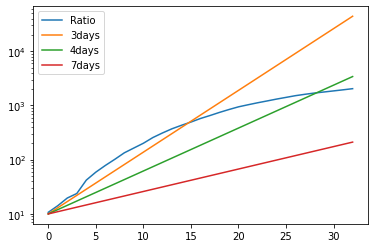

In [12]:
start = 10
df_predict = fit_data('US', df, cutoff=start, ignore_last=1)
df_predict['3days'] = multiply(df_predict.index, start, 1.3)
df_predict['4days'] = multiply(df_predict.index, start, 1.2)
df_predict['7days'] = multiply(df_predict.index, start, 1.1)
df_predict = df_predict.drop(columns=['predict'])
df_predict.plot(logy=True)

In [13]:
start = 10
# Create reference
df_predict = fit_data('Italy', df, cutoff=start, ignore_last=1)
df_predict = df_predict.rename(columns={'Ratio': 'Italy'})

# Use US as the "predicted" reference
# df_predict['predict'] = fit_data('US', df, ignore_last=1)['predict']

# Add more countries
countries = [
#     'China',
#     'Iran',
#     'Turkey',
#     'United Kingdom',
    'US',
    'Italy',
#     'France',
    'Spain',
    'Switzerland',
#     'Ukraine'
]
for country in countries:
    df_predict[country] = fit_data(country, df, cutoff=start, ignore_last=1)['Ratio']

# Add references

df_predict['3days'] = multiply(df_predict.index, start, 1.3)
df_predict['4days'] = multiply(df_predict.index, start, 1.2)
df_predict['7days'] = multiply(df_predict.index, start, 1.1)

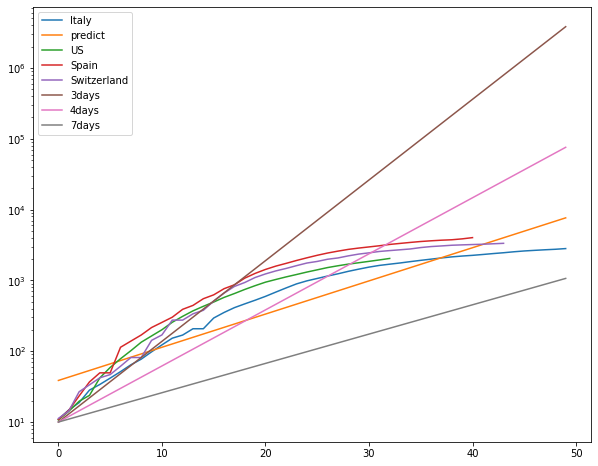

In [15]:
# df_predict = fit_data('France', df, ignore_last=1)
df_predict.plot(logy=True, figsize=(10,8))

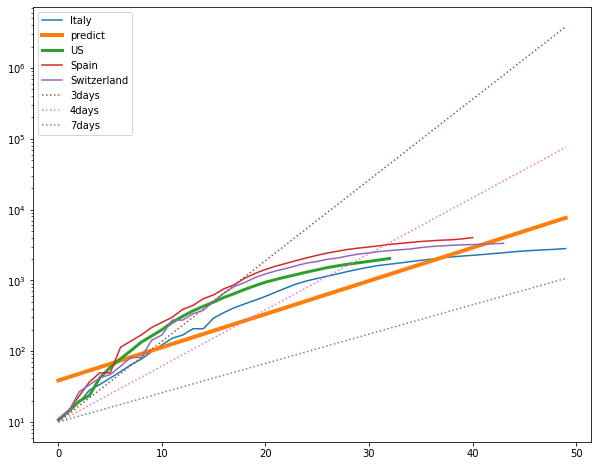

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
for col in df_predict.columns:
    if col == 'predict':
        df_predict[col].plot(logy=True, lw=4)
    elif col == 'US':
        df_predict[col].plot(logy=False, lw=3)
    elif col.endswith('days'):
        df_predict[col].plot(logy=False, linestyle=':')
    else:
        df_predict[col].plot(logy=False)
ax.legend()

In [17]:
df_predict.columns

Index(['Italy', 'predict', 'US', 'Spain', 'Switzerland', '3days', '4days',
       '7days'],
      dtype='object')

In [18]:
df_daily = df_predict[countries].diff()

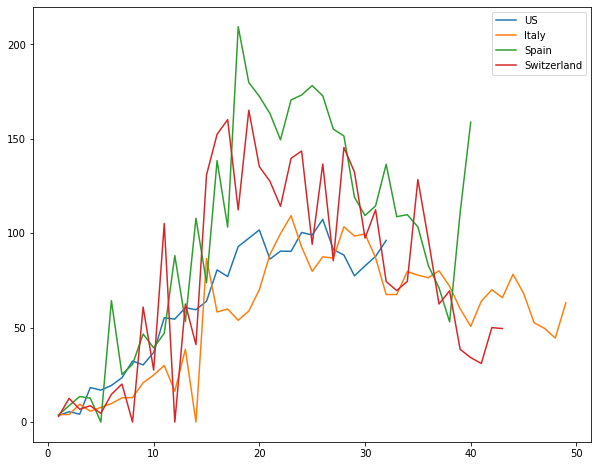

In [19]:
df_daily.plot(figsize=(10, 8))

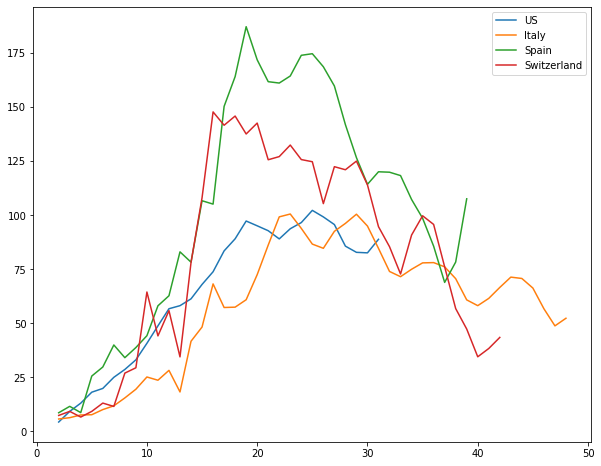

In [20]:
df_daily = df_daily[df_daily.isnull() == False]
df_daily_smooth = df_daily.rolling(3, center=True).mean()
df_daily_smooth.plot(figsize=(10,8))

In [21]:
df_daily_smooth.head()

,US,Italy,Spain,Switzerland
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,4.366972,5.772222,8.659420,7.416667
3,9.291539,6.377778,11.623188,9.291667
4,13.100917,7.633333,8.724638,6.666667
